In [124]:
%%javascript

Jupyter.keyboard_manager.command_shortcuts.add_shortcut('r', {
    help : 'run all cells',
    help_index : 'zz',
    handler : function (event) {
        IPython.notebook.execute_all_cells();
        return false;
    }}
);

<IPython.core.display.Javascript object>

In [125]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [126]:
variable="air.2m.intersections"
#variable="air.sfc.intersections"
#variable="apcp.intersections"
#variable="rhum.2m.intersections"

In [127]:
months=["01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12"]
years=range(1999, 2016)

In [128]:
# Importing WNV data
df= pd.read_csv("/Users/sparshagarwal/Downloads/WMV_data/Arbovirus_risk_modeling_US/WNV_human_cases/WNV_NI_NNI_1999to2015_prevalence_incidence_final_20180530.csv", encoding='latin-1')
df=df[df["Select_County"]==1]
df.rename(columns = {'GEOID10':'GEOID'}, inplace = True)

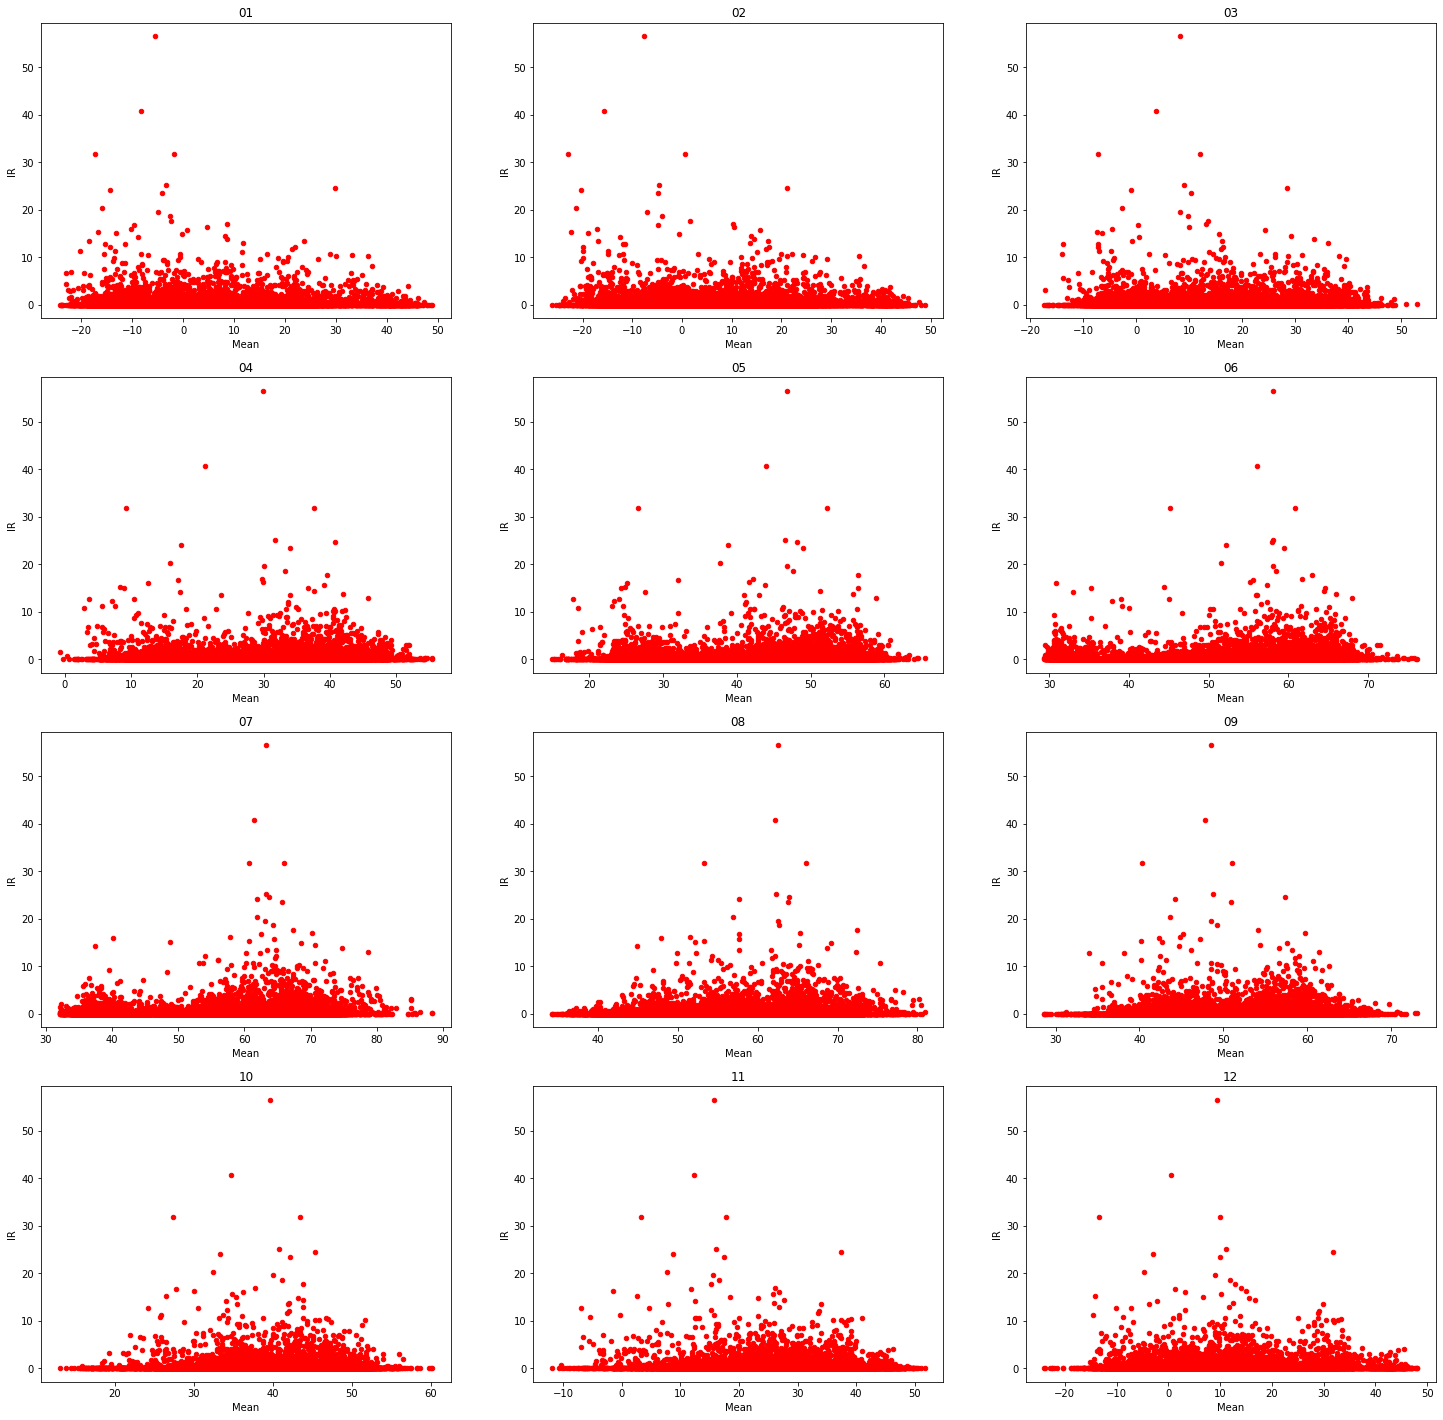

In [129]:
for k in range(len(months)):
    df_mod=df.copy()
    for j in years:
        #Importing monthly envrionmental conditions data
        temp= pd.read_csv("/Users/sparshagarwal/Downloads/WMV_data/intersections/" + variable +"/"+ str(j) + "_" + months[k] + ".csv")
        # Only considering mean values
        temp=temp[["GEOID", "mean"]]
        temp.rename(columns = {'mean':'mean_' + str(j)}, inplace = True)
        # Adding columns corresponding to all years
        df_mod=df_mod.join(temp.set_index('GEOID'), on='GEOID')
            
    x=[]
    y=[]
    for i in years:
        y= y + list(df_mod["NI_IR_" + str(i)])
        x= x + list(df_mod["mean_" + str(i)])
    df_combined=pd.DataFrame()
    df_combined["Mean"]=x
    df_combined["IR"]=y
    if(variable == "air.2m.intersections" or variable == "air.sfc.intersections"):
        # Converting Celsius to Fahrenheit
        x_mod=[((i-273)*9/5 + 32) for i in x]
        df_combined["Mean"]=x_mod
    ax=plt.subplot(4,3,k+1)
    ax.set_title(str(months[k]))
    df_combined.plot(kind='scatter',x='Mean',y='IR',color='red', ax=ax, figsize=(25,25)) 